In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import get_data
import matplotlib.pyplot as plt
import population_activity as pop
import helper_functions as hf
import analysis
import plots
import statistics_test as st

from IPython.display import display, HTML
def print_large(text):
    display(HTML(f"<span style='font-size: 20px;'>{text}</span>"))
    

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']
maps = ['19']

correlations_between = np.zeros(len(datapaths))
correlations_within = np.zeros(len(datapaths))
correlations_shuff = np.zeros(len(datapaths))
correlations_days = np.zeros(len(datapaths))


for i,datapath in enumerate(datapaths):
    hist_sorts1 = analysis.sort_maps_from_reference_AK(datapath, 'Context1', reference='17', maps = maps, transients = False, hist='hist', remove_inactive=False)
    hist_sorts2 = analysis.sort_maps_from_reference_AK(datapath, 'Context2', reference='17', maps = maps, transients = False, hist='hist', remove_inactive=False)
    correlations_between[i] = pop.ManifoldAnalysis.population_correlation(hist_sorts1[-1], hist_sorts2[-1])
    correlations_days[i] = pop.ManifoldAnalysis.population_correlation(hist_sorts1[0], hist_sorts1[-1])

    hist_shuff=analysis.sort_maps_from_reference_AK_shuffle(datapath, 'Context1', reference='17', maps = maps, transients = False, hist='hist',shuffle_type=None, remove_inactive=False)
    correlations_shuff[i] = pop.ManifoldAnalysis.population_correlation(hist_sorts1[-1], hist_shuff[-1])
    
    w1,w2 =analysis.sort_maps_from_reference_within_session_AK(datapath, 'Context1', maps=['19'])
    correlations_within[i] = pop.ManifoldAnalysis.population_correlation(w1[0], w2[0])


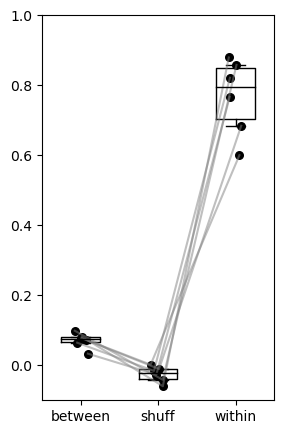

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time,2.250996,2,1.125498,233.864153,4.018788e-09,0.9726,0.538497
1,Error,0.048126,10,0.004813,NaN,NaN,NaN,NaN


,Timepoint 1,Timepoint 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Diff,SD Diff,Normal Dist.,Normality p-value
0,T1,T2,t-test,6.7368,0.0011,0.0033,**,2.7503,Cohen's d,0.0970,0.0353,True,0.1386
1,T1,T3,t-test,-16.1331,1.6673e-05,5.0018e-05,***,-6.5863,Cohen's d,-0.6970,0.1058,True,0.1761
2,T2,T3,t-test,-15.1699,2.2562e-05,6.7686e-05,***,-6.1931,Cohen's d,-0.7939,0.1282,True,0.7947


In [12]:
print_large('\n' + '='*50)
print_large('Population vector correlation between context, within context and shuffeled')
print_large('='*50)

fig, ax = plt.subplots(figsize=(3, 5))
plots.boxplot_with_points_and_lines(np.array([correlations_between, correlations_shuff, correlations_within]).T, ['between','shuff', 'within'],ax, '',ylim=[-0.1,1])
plt.show()  
print_large('RM ANOVA: between context, within context, shuffeled')
display(st.repeated_measures_anova_single_condition(np.array([correlations_between, correlations_shuff, correlations_within]).T))
print_large('Post hoc: ')
display(st.post_hoc_timepoints(np.array([correlations_between, correlations_shuff, correlations_within])))

In [3]:
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']

results = []
results_shuff = []

for datapath in datapaths:
    scores_test, scores_new_list, predictions_test, predictions_new_list, y_test, y_new_list = analysis.decode_position_between(datapath, '19', 
        'Context1', '19', 'Context2', model='gnb', shuffle=False)
    results.append({
        'datapath': datapath,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,
        'predictions_test': predictions_test,
        'predictions_new_list': predictions_new_list,
        'y_test': y_test,
        'y_new_list': y_new_list
    })

    scores_test, scores_new_list, predictions_test, predictions_new_list, y_test, y_new_list = analysis.decode_position_between(datapath, '19', 
        'Context1', '19', 'Context2', model='gnb', shuffle=True)
    
    results_shuff.append({
        'datapath': datapath,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,
        'predictions_test': predictions_test,
        'predictions_new_list': predictions_new_list,
        'y_test': y_test,
        'y_new_list': y_new_list
    })

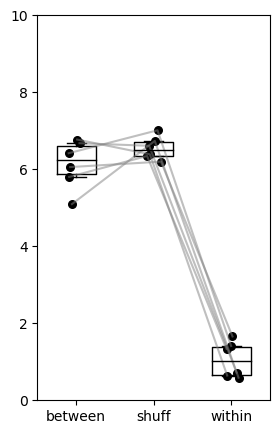

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time,112.199291,2,56.099646,229.386673,4.417590e-09,0.969837,0.920947
1,Error,2.445637,10,0.244564,NaN,NaN,NaN,NaN


,Timepoint 1,Timepoint 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Diff,SD Diff,Normal Dist.,Normality p-value
0,T1,T2,t-test,-1.4281,0.2126,0.6379,,-0.5830,Cohen's d,-0.4117,0.7062,True,0.5745
1,T1,T3,t-test,15.9505,1.7632e-05,5.2897e-05,***,6.5118,Cohen's d,5.0783,0.7799,True,0.0799
2,T2,T3,t-test,22.3965,3.2974e-06,9.8923e-06,***,9.1433,Cohen's d,5.4900,0.6004,True,0.5666


In [13]:
print_large('\n' + '='*50)
print_large('decoding (MAE) between context, within context and shuffeled')
print_large('='*50)

mae_between = [res['scores_new_list'][0]['mae'] for res in results]
mae_shuff = [res['scores_new_list'][0]['mae'] for res in results_shuff]
mae_within = [res['scores_test']['mae'] for res in results]

fig, ax = plt.subplots(figsize=(3, 5))
plots.boxplot_with_points_and_lines(np.array([mae_between, mae_shuff, mae_within]).T, ['between','shuff', 'within'],ax, '',ylim=[0,10])

plt.show()  
print_large('RM ANOVA: between context, within context, shuffeled')
display(st.repeated_measures_anova_single_condition(np.array([mae_between, mae_shuff, mae_within]).T))
print_large('Post hoc: ')
display(st.post_hoc_timepoints(np.array([mae_between, mae_shuff, mae_within])))